In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline


In [2]:
loan_data = pd.read_excel('loans2.xlsx')
#raw_data = pd.read_excel('Loan_Default.xlsx')
# print the shape
print(loan_data.shape)

#runs the first 5 rows
loan_data.head(5)

(2638, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
#Describes the dataset information and type
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2638 non-null   object 
 1   year                       2638 non-null   int64  
 2   loan_limit                 2579 non-null   object 
 3   Gender                     2638 non-null   object 
 4   approv_in_adv              2623 non-null   object 
 5   loan_type                  2638 non-null   object 
 6   loan_purpose               2637 non-null   object 
 7   Credit_Worthiness          2638 non-null   object 
 8   open_credit                2638 non-null   object 
 9   business_or_commercial     2638 non-null   object 
 10  loan_amount                2638 non-null   int64  
 11  rate_of_interest           145 non-null    float64
 12  Interest_rate_spread       130 non-null    float64
 13  Upfront_charges            133 non-null    float

In [4]:
#counts and determines the target- (Status) imbalance
loan_data['Status'].value_counts(normalize=True)

1    0.95072
0    0.04928
Name: Status, dtype: float64

In [5]:
#raw_data = raw_data[:50000]
print(loan_data.shape)

(2638, 34)


In [6]:
# Checking for null values
loan_data.isnull().sum()

ID                              0
year                            0
loan_limit                     59
Gender                          0
approv_in_adv                  15
loan_type                       0
loan_purpose                    1
Credit_Worthiness               0
open_credit                     0
business_or_commercial          0
loan_amount                     0
rate_of_interest             2493
Interest_rate_spread         2508
Upfront_charges              2505
term                            3
Neg_ammortization               0
interest_only                   0
lump_sum_payment                0
property_value               1069
construction_type               0
occupancy_type                  0
Secured_by                      0
total_units                     0
income                         91
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                            15
submission_of_application      15
LTV           

In [7]:
# Investigate all the elements whithin each Feature 

uniqueValues = loan_data.nunique()
print(uniqueValues)


ID                           2638
year                            1
loan_limit                      2
Gender                          4
approv_in_adv                   2
loan_type                       3
loan_purpose                    4
Credit_Worthiness               2
open_credit                     2
business_or_commercial          2
loan_amount                   115
rate_of_interest               27
Interest_rate_spread          128
Upfront_charges               105
term                           21
Neg_ammortization               2
interest_only                   2
lump_sum_payment                2
property_value                143
construction_type               2
occupancy_type                  3
Secured_by                      2
total_units                     4
income                        348
credit_type                     4
Credit_Score                  399
co-applicant_credit_type        2
age                             7
submission_of_application       2
LTV           

In [8]:
#gets the column variables 
loan_data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [9]:
#Deleting the outlier

#loan_data = loan_data[loan_data['Age'] < 100]

#loan_data.shape

In [10]:
loan_data['Status'].value_counts()

1    2508
0     130
Name: Status, dtype: int64

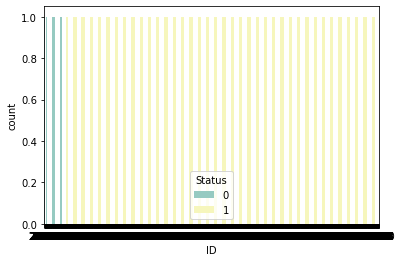

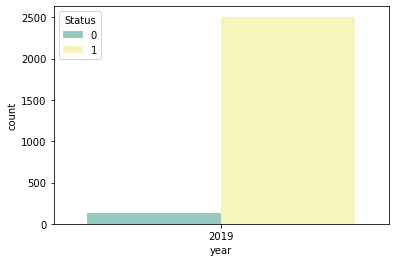

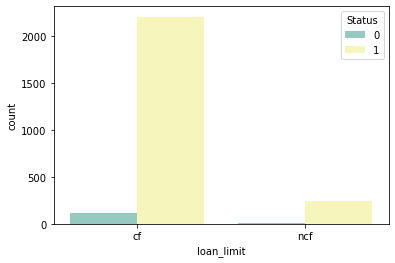

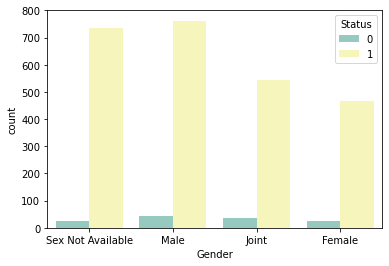

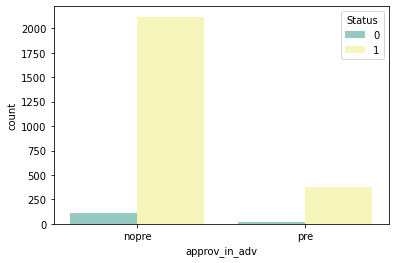

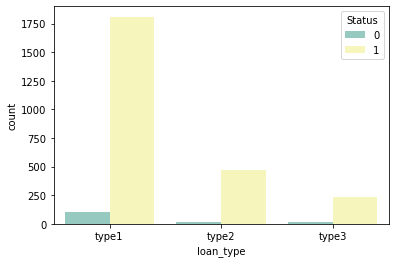

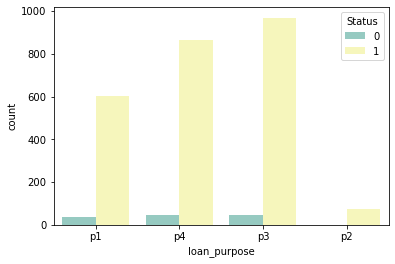

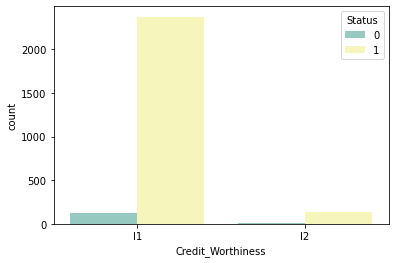

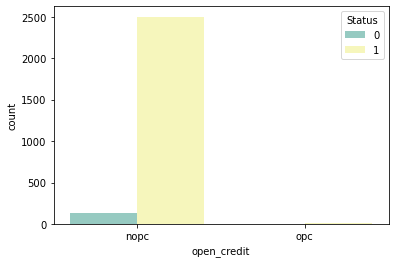

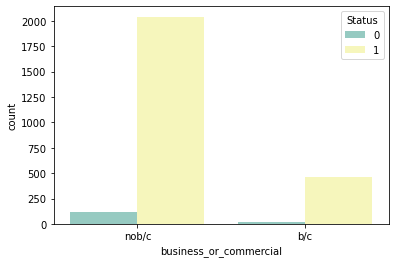

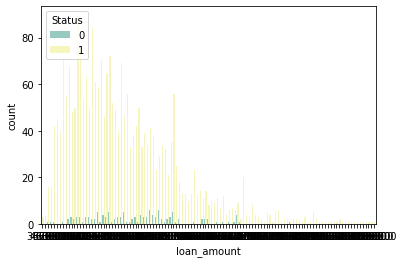

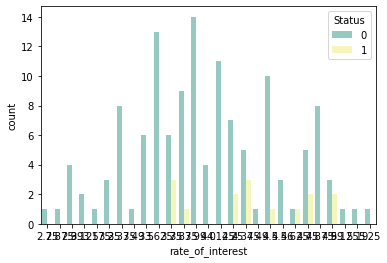

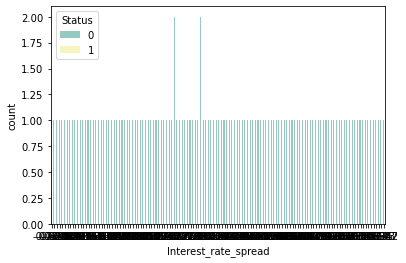

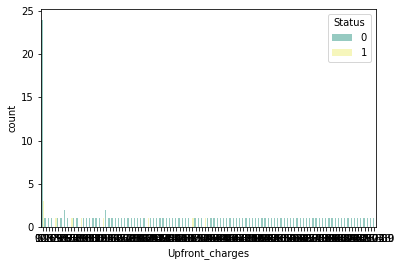

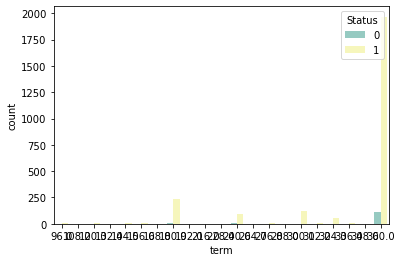

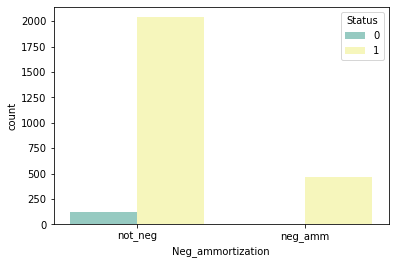

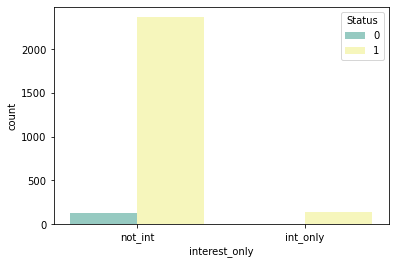

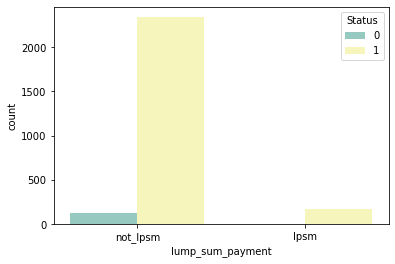

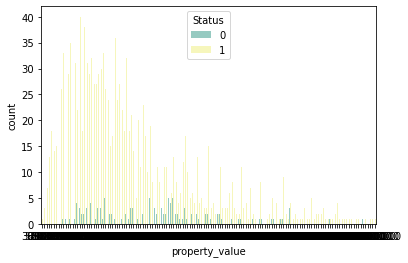

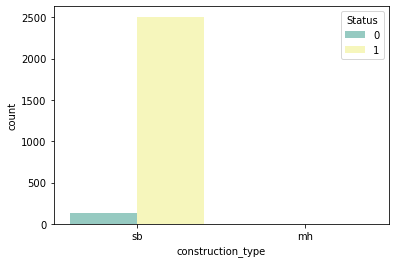

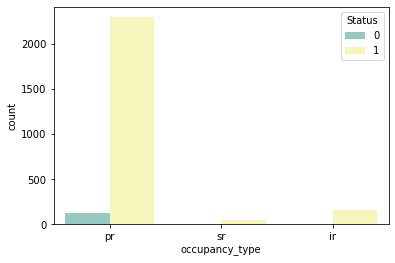

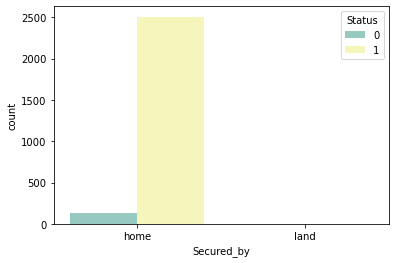

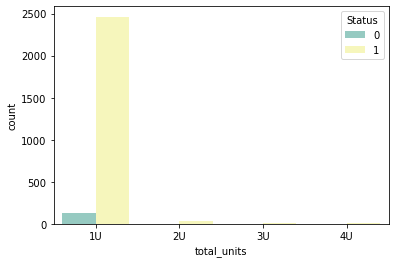

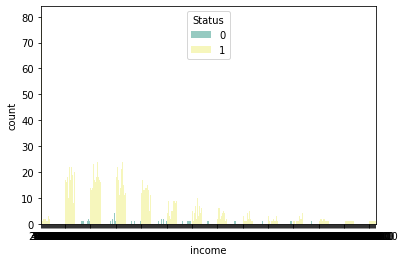

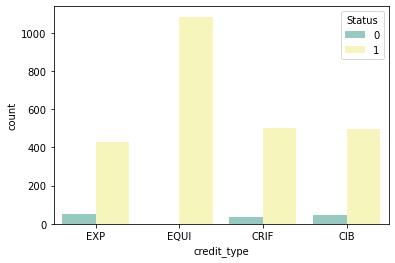

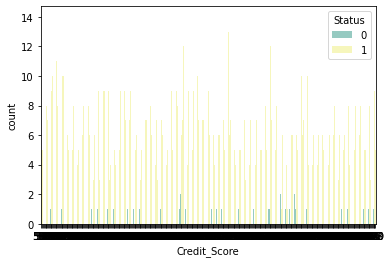

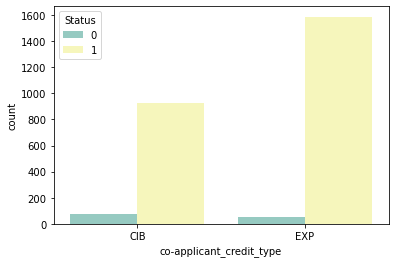

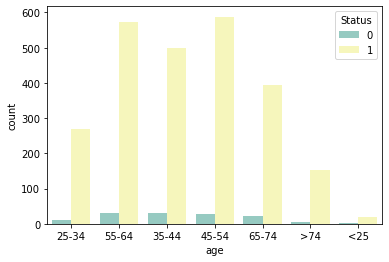

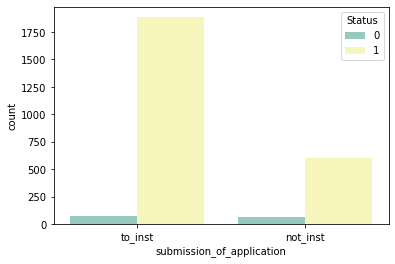

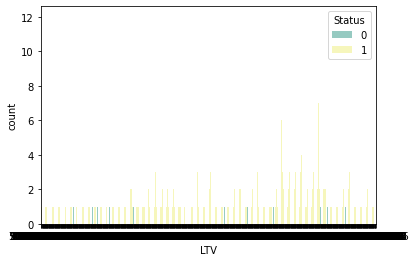

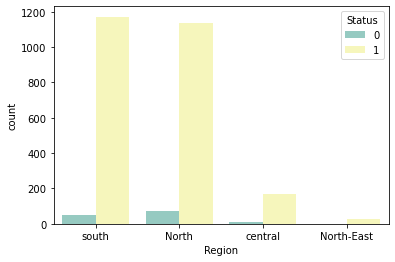

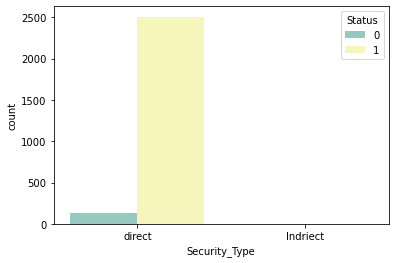

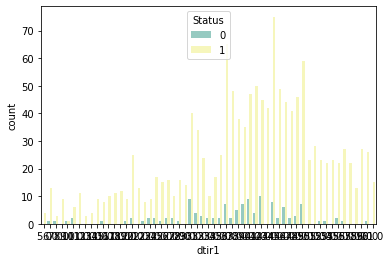

In [11]:
features = ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'dtir1']
    
for f in features:
    sns.countplot(x = f, data = loan_data, palette = 'Set3', hue = 'Status')
    plt.show()

In [12]:
loan_data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [13]:
# Turning categorical variables into numeric representation

new_loan_data = pd.get_dummies(loan_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(loan_data.shape)
# print the shape
print(new_loan_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_loan_data['Status'][new_loan_data['Status'] == 'Yes'] = 1
new_loan_data['Status'][new_loan_data['Status'] == 'No'] = 0

# Visualizing the data
new_loan_data

(2638, 34)
(2638, 4991)


<ipython-input-13-ec84173dbb80>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_loan_data['Status'][new_loan_data['Status'] == 'Yes'] = 1
<ipython-input-13-ec84173dbb80>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_loan_data['Status'][new_loan_data['Status'] == 'No'] = 0


,Status,ID_24890,ID_24891,ID_24892,ID_24893,ID_24894,ID_24895,ID_24896,ID_24897,ID_24898,...,dtir1_52.0,dtir1_53.0,dtir1_54.0,dtir1_55.0,dtir1_56.0,dtir1_57.0,dtir1_58.0,dtir1_59.0,dtir1_60.0,dtir1_61.0
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2634,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2635,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2636,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
#k = raw_data['Status']
#new_raw_data['Status'] = k

In [15]:
#Obtaining predictors and target variables
X= new_loan_data.drop(['Status'],axis=1)
y = new_loan_data['Status']
y = y.astype(int)


print(X.shape)
print(y.shape)

(2638, 4990)
(2638,)


In [16]:
#import over_sampler library - SMOTE
#from imblearn.over_sampling import SMOTE
#over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_train, y_train,n_samples, t='minority'),k_neighbors=2)
#X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

In [17]:
#import library to balance the imbalanced dateset
from imblearn.combine import SMOTETomek
smk = SMOTETomek()


In [18]:
#fit the oversampler on the imbalanced dataset
X_res, y_res = smk.fit_resample(X,y)
#X, y = oversample.fit_resample(X, y)

In [19]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 2508, 0: 130})
Resampled dataset shape Counter({1: 2505, 0: 2505})


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size = 0.8, test_size=0.2, random_state=15)


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[499   9]
 [  0 494]]
0.9910179640718563
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       508
           1       0.98      1.00      0.99       494

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002



In [24]:
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = rf_classifier.predict_proba(X_test)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example


[0.9, 0.0, 1.0, 1.0, 0.0]

In [25]:
print( roc_auc_score(y_test, prob_y_2) )

0.9999362427874653


In [26]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [27]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [28]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 560,
 'criterion': 'gini'}

In [29]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [30]:
best_random_grid=rf_randomcv.best_estimator_

In [31]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[496  12]
 [  0 494]]
Accuracy Score 0.9880239520958084
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99       508
           1       0.98      1.00      0.99       494

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002



In [32]:
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = best_random_grid.predict_proba(X_test)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example


[0.901673201798202,
 0.0006666666666666666,
 0.9887481684981685,
 0.9996428571428573,
 0.001]

In [33]:
print( roc_auc_score(y_test, prob_y_2) )

0.9999920303484331


In [34]:
#import xgboost